#### 공부 시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수를 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <= [조건] 데이터의 분포가 선형이어야 함  

[1] 데이터 준비

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 14개 데이터셋
jumsu=range(7, 100, 7)
len(jumsu), jumsu[-1]

hour=list(range(1,29,2))
len(hour)

14

In [4]:
# List => DataFrame으로 변환
hourDF=pd.DataFrame(hour,columns=['Hour'])
hourDF.head()

jumsuSR=pd.Series(jumsu)

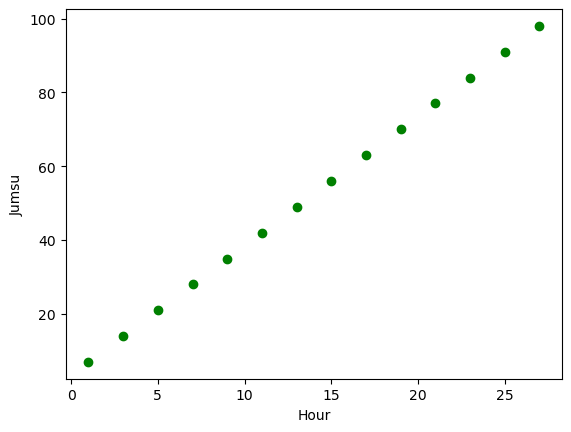

In [5]:
# 현재 데이터의 분포 확인
plt.plot(hourDF, jumsuSR, 'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

[2] 모델 생성 및 학습 진행

In [6]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [7]:
# 학습 모델 인스턴스 생성
model=LinearRegression()

In [9]:
# 학습 진행 => 최개한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(hourDF, jumsuSR)

LinearRegression()

In [12]:
# 학습 후 모델 파라미터 확인
print(f'기울기 : {model.coef_}\n절편 : {model.intercept_}')

기울기 : [3.5]
절편 : 3.500000000000014


In [16]:
# y=ax+b
pre_jumsu= model.coef_[0]*hourDF+model.intercept_
pre_jumsu=pre_jumsu.values.reshape(-1)

In [17]:
# 실제 점수와 예측 점수의 차이 확인
real_jumsu=jumsuSR.to_numpy()
real_jumsu - pre_jumsu

array([-1.33226763e-14, -1.06581410e-14, -1.06581410e-14, -7.10542736e-15,
       -7.10542736e-15, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42108547e-14,  1.42108547e-14])

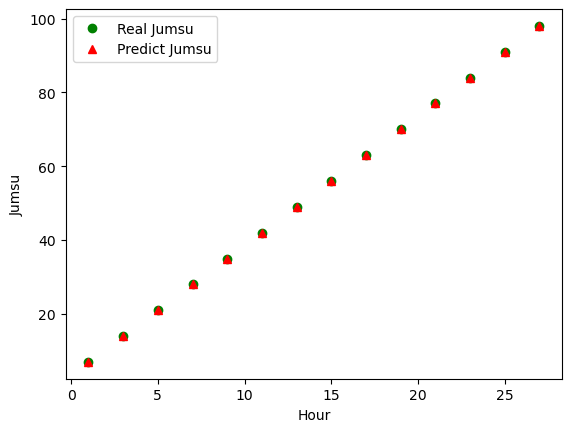

In [19]:
# 현재 데이터의 분포 확인

plt.plot(hourDF, jumsuSR, 'go', label='Real Jumsu')
plt.plot(hourDF, pre_jumsu, 'r^', label='Predict Jumsu')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.legend()
plt.show()

[3] 모델 성능 평가

In [20]:
model.score(hourDF, jumsuSR)

1.0

In [25]:
# 오차 계산 즉, 손실/비용함수 확인
# root_mean_squared_error => v.1.4 이상
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
import sklearn
sklearn.__version__

'1.3.0'

In [26]:
pre_y=model.predict(hourDF)

In [28]:
mse=mean_squared_error(jumsuSR, pre_y)
rmse=mean_squared_error(jumsuSR, pre_y, squared=False)
mae=mean_absolute_error(jumsuSR, pre_y)
r2=r2_score(jumsuSR, pre_y)

In [30]:
# 손실/비용함수 값은 0에 가까울 수록
# 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 6.857455154671224e-29
rmse : 8.280975277508818e-15
mae : 6.026924990822278e-15
r2 : 1.0
